## 라이브러리 로드

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

(x_train, _), (x_test, _) = mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
_

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [30]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [31]:
x_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [32]:
28 * 28

784

## 스케일 및 형태 변환

In [33]:
x_train = x_train.astype('float32') / 255 #최대값이 255 -> 최대값 1로 하는 스케일
x_test = x_test.astype('float32') / 255

x_train  = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

In [34]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``loc`` and ``scale`` are both scalars.
        Otherwise, ``np.broadcast(loc, scale).size`` samples are drawn.

## 노이즈를 추가한 변수 생성

In [35]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0 , scale = 1.0, size = x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0 , scale = 1.0, size = x_test.shape)#평균0, 분산1, size는 원래대로하는 랜덤

x_train_noisy = np.clip(x_train_noisy, 0., 1.) # np.clip(a, a_min, a_max, out=None)
x_test_noisy  = np.clip(x_test_noisy, 0., 1.) # 0보다 작으면 0, 1보다 크면 1로 변환

In [36]:
x_train_noisy

array([[0.        , 0.        , 0.        , ..., 0.        , 0.28919626,
        0.28739782],
       [0.        , 0.        , 0.        , ..., 0.16954039, 0.        ,
        0.        ],
       [0.        , 0.4096594 , 0.        , ..., 0.05696728, 0.87220504,
        0.86639173],
       ...,
       [0.55350684, 0.        , 0.        , ..., 0.04687695, 0.        ,
        0.36624013],
       [0.        , 0.69506646, 0.16952364, ..., 0.13997527, 0.79671617,
        0.02869463],
       [0.37392378, 0.31763033, 0.82238894, ..., 0.        , 0.        ,
        0.        ]])

In [41]:
x_train_noisy.shape

(60000, 784)

## 모델링

In [37]:
model = Sequential()
model.add(Dense(128, activation= 'relu', input_dim = 784)) #여기부터 히든레이어!
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid')) 
#활성함수를 뭘 쓰든 상관 없지만, 마지막 Dense에서 sigmoid 쓰면 "맞은 것은 맞다, 아닌것은 아니다"라고 명확하게 표현 할 것 같아서 써봄.
# 뭘 쓰든 상관은 없음. 여러개 돌려보고 결과값이 잘 나오는 걸 쓰면 된다~
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

## 모델 Fit

In [38]:
model.fit(x_train_noisy, x_train, nb_epoch = 100, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.2641 - val_loss: 0.2032
Epoch 2/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1838 - val_loss: 0.1693
Epoch 3/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.1652 - val_loss: 0.1595
Epoch 4/100
60000/60000 [==============================] - 4s 58us/step - loss: 0.1580 - val_loss: 0.1537
Epoch 5/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1529 - val_loss: 0.1500
Epoch 6/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1492 - val_loss: 0.1463
Epoch 7/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1456 - val_loss: 0.1431
Epoch 8/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.1424 - val_loss: 0.1406
Epoch 9/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1398 - val_loss: 0.1

60000/60000 [==============================] - 3s 58us/step - loss: 0.1131 - val_loss: 0.1158
Epoch 78/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.1130 - val_loss: 0.1159
Epoch 79/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1129 - val_loss: 0.1157
Epoch 80/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1129 - val_loss: 0.1157
Epoch 81/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1128 - val_loss: 0.1154
Epoch 82/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1127 - val_loss: 0.1156
Epoch 83/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1126 - val_loss: 0.1155
Epoch 84/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1126 - val_loss: 0.1155
Epoch 85/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1125 - val_loss: 0.1152
Epoch 86/100
60000/60000 [========================

In [39]:
decoded_imgs = model.predict(x_test_noisy)

## original vs 예측값 시각화

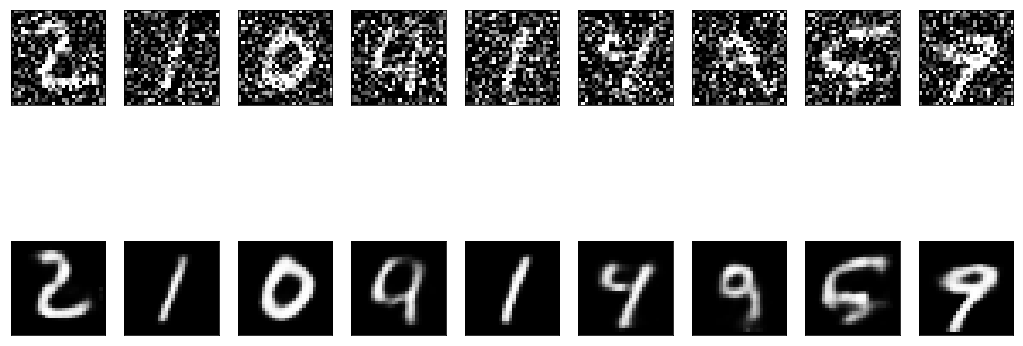

In [40]:
# decoded_imgs = model.predict(x_test_noisy)

n=10
plt.figure(figsize =(20,6))
for i in range(1,n):
    #display original
    ax =plt.subplot(3,n,i) # subplot(nrows, ncols, index, **kwargs)
    plt.imshow(x_test_noisy[i].reshape(28,28,)) 
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax=plt.subplot(3, n, i+2*n)
    plt.imshow(decoded_imgs[i].reshape(28,28,))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()